# TODO:
- check and add correct time scale
- +find method to visualize correlation -> distribution histogram
- try to use k-means clustering or other methods to cluster data
- try to understand or visualize the different levels comportement

# Correlation between the fission yeast transcriptome and proteome

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from ipywidgets import IntSlider, interact

%load_ext autoreload
%autoreload 2

# Loading data

In [2]:
# set data path
path_data_mRNA = "data/pat1_average_modified.txt"
path_data_prot = "data/wtratioall.csv"

# read data from files
raw_data_mRNA = pd.read_csv(path_data_mRNA, sep='\t', header=None)
raw_data_prot = pd.read_csv(path_data_prot, index_col=0)

In [3]:
# preview of the raw mRNA data
raw_data_mRNA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,aap1,AAP1,SPBC1652.02 SPBC16A3.20C,1.0,22.703531,0.960360,0.544460,0.896232,1.160251,1.252143,2.309153,2.310750,2.449327,2.706837,3.064384
1,abc1: C2D10.18,ABC1,SPBC2D10.18,1.0,1.043491,0.622283,0.663191,0.619409,0.648403,0.662236,0.655953,0.580761,0.606205,0.752322,0.798264
2,abc1: C9E9.12c,ABC1,SPAC9E9.12C,1.0,2.112546,0.906822,0.565746,0.535220,1.224398,10.170195,7.380023,4.455168,2.804587,1.657471,1.310630
3,abp1,CBP1 ABP1,SPBC1105.04C,1.0,1.351277,0.884985,0.705397,0.401055,0.202862,0.175360,0.829920,0.959749,1.121036,1.122949,1.103435
4,abp2,ABP2,SPBC1861.02,1.0,0.816301,1.969788,1.736116,1.057102,0.494822,0.372226,0.533438,0.851486,0.989702,1.115665,1.159631


In [4]:
# preview of the raw protein data
raw_data_prot.head()

,A_00,A_01,A_02,A_03,A_04,A_05,A_06,A_07,A_08,A_09,...,C_01,C_02,C_03,C_04,C_05,C_06,C_07,C_08,C_09,C_10
SPAC1002.02,1,1.451188,3.734827,6.181905,7.607555,5.215707,3.439898,2.598756,2.183230,1.811290,...,1.555395,3.676540,6.030714,6.635780,5.153358,3.210663,2.511956,1.853247,1.525539,1.332680
SPAC1002.03c,1,0.922745,0.763064,0.749450,0.742595,0.771641,0.819817,0.859544,0.849914,0.838128,...,0.901151,0.828585,0.779982,0.767321,0.813157,0.830826,0.875965,0.938763,0.819587,0.850455
SPAC1002.04c,1,1.063774,1.109541,1.105289,1.256196,1.193269,0.834514,0.698355,0.714280,0.716728,...,0.834014,0.829090,0.911089,1.179868,1.106116,0.824800,0.652223,0.654474,0.618405,0.651751
SPAC1002.07c,1,0.946289,1.270676,1.577819,2.059521,2.079450,2.026755,1.934475,1.886784,1.820797,...,1.145764,1.396319,1.819543,2.141494,2.219369,2.134959,2.000173,1.983480,1.959289,1.902660
SPAC1002.09c,1,0.909058,0.871595,0.907030,0.941867,0.963464,0.963832,0.978117,1.026633,1.043288,...,0.917147,0.879789,0.881237,0.897882,0.903383,0.907655,0.899867,0.909359,0.945886,0.975173


## Processing raw data

### averaging and cleaning proteins data

In [5]:
# split protein data into 3 sets
data_prot_A = pd.DataFrame(raw_data_prot.ix[:,0:11].values)
data_prot_B = pd.DataFrame(raw_data_prot.ix[:,11:22].values)
data_prot_C = pd.DataFrame(raw_data_prot.ix[:,22:33].values)

# compute average of the 3 data sets
data_prot = (data_prot_A + data_prot_B + data_prot_C).copy()/3.0

# set columns and rows indexes
data_prot.columns = ['t'+str(k) for k in range(0,11)]
data_prot.index = raw_data_prot.index

# show begining of dataframe
data_prot.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
SPAC1002.02,1.0,1.393371,3.257203,5.591645,6.932151,5.479337,3.574659,2.726113,2.114409,1.764191,1.439884
SPAC1002.03c,1.0,0.910152,0.785974,0.750362,0.746000,0.770242,0.800074,0.843706,0.872157,0.819914,0.839864
SPAC1002.04c,1.0,0.990121,0.980455,1.050549,1.248047,1.217455,0.880529,0.704999,0.712103,0.701598,0.795477
SPAC1002.07c,1.0,1.046894,1.307253,1.640936,2.070811,2.125540,2.078482,1.997900,1.900363,1.857979,1.780422
SPAC1002.09c,1.0,0.904997,0.855320,0.872414,0.904201,0.923575,0.932110,0.939830,0.961271,0.991512,1.018891


### cleaning mRNA data

In [6]:
# remove first 2 columns (TODO: need to check if it removes useful names)
data_mRNA = raw_data_mRNA.drop([0,1], axis=1).copy()

# set columns indexes
data_mRNA.set_index([2], inplace=True)
data_mRNA.index.name = None
data_mRNA.columns = ['t'+str(k) for k in range(0,12)]

# drop data without values
data_mRNA.dropna(how='any', inplace=True)

# show begining of dataframe
data_mRNA.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
SPBC1652.02 SPBC16A3.20C,1.0,22.703531,0.960360,0.544460,0.896232,1.160251,1.252143,2.309153,2.310750,2.449327,2.706837,3.064384
SPBC2D10.18,1.0,1.043491,0.622283,0.663191,0.619409,0.648403,0.662236,0.655953,0.580761,0.606205,0.752322,0.798264
SPAC9E9.12C,1.0,2.112546,0.906822,0.565746,0.535220,1.224398,10.170195,7.380023,4.455168,2.804587,1.657471,1.310630
SPBC1105.04C,1.0,1.351277,0.884985,0.705397,0.401055,0.202862,0.175360,0.829920,0.959749,1.121036,1.122949,1.103435
SPBC1861.02,1.0,0.816301,1.969788,1.736116,1.057102,0.494822,0.372226,0.533438,0.851486,0.989702,1.115665,1.159631


Some of the values in mRNA are duplicates and need to be dealt with

In [7]:
duplicated_data_mRNA = raw_data_mRNA[raw_data_mRNA[[2]].isin(data_mRNA[data_mRNA.index.duplicated()].index).values].copy()
duplicated_data_mRNA = duplicated_data_mRNA.sort_values([2])

# save duplicated mRNA data
duplicated_data_mRNA.to_csv('data/duplicated_mRNA.csv')

# show preview
duplicated_data_mRNA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
507,C13G7.02c.B,NaN,SPAC13G7.02C,1.0,0.480851,1.821550,2.200407,2.647362,3.204608,2.962069,0.816963,0.817025,0.790903,1.049258,1.244611
506,C13G7.02c.A,NaN,SPAC13G7.02C,1.0,1.139014,5.825920,7.595293,19.737550,24.382723,27.602160,7.971517,6.919817,9.305873,12.082448,14.460800
505,C13G7.02c,NaN,SPAC13G7.02C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,ade2: min10,ADE2 MIN10,SPAC144.03,1.0,0.597784,0.552436,0.423964,0.333494,0.287265,0.176862,0.230313,0.223476,0.261122,0.277014,0.331003
3819,I21_ade2: min10,ADE2 MIN10,SPAC144.03,1.0,1.247429,2.754731,2.002274,1.818740,1.673060,2.102656,2.313404,2.398567,3.019608,3.698596,3.454753


We have some duplicated mRNA data which will be removed during the merging phase.

## Filtering data

Extracting data with common index between the protein and mRNA data

In [8]:
# create the pattern and the filter
pattern = '|'.join(data_prot.index.values)
filter_ = data_mRNA.index.str.contains(pattern, case=False, na=False)

# extract mRNA data with corresponding protein name
data_mRNA = data_mRNA[filter_]

# show preview
data_mRNA.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
SPBC2D10.18,1.0,1.043491,0.622283,0.663191,0.619409,0.648403,0.662236,0.655953,0.580761,0.606205,0.752322,0.798264
SPBC1105.04C,1.0,1.351277,0.884985,0.705397,0.401055,0.202862,0.175360,0.829920,0.959749,1.121036,1.122949,1.103435
SPBC32H8.12C,1.0,0.621846,0.325697,0.390388,0.419048,0.435039,0.539601,0.403898,0.337072,0.281851,0.265122,0.281973
SPAC630.03,1.0,0.945575,0.576106,0.698916,0.638058,0.423130,0.352959,0.746192,0.829190,0.843786,0.889201,0.842393
SPBC106.04,1.0,0.871751,0.869876,1.023361,0.727945,0.261486,0.143920,0.437443,0.805628,0.984534,0.974699,1.019219


In [9]:
# comparing size of protein data and filtered mRNA data
print('Size of the protein data:', data_prot.shape)
print('Size of the filtered mRNA data:', data_mRNA.shape)
print('Lost entries:', data_prot.shape[0]-data_mRNA.shape[0])

Size of the protein data: (2969, 11)
Size of the filtered mRNA data: (2874, 12)
Lost entries: 95


We lost 95 entries in the protein data which are not in the mRNA data or with unavailable data. 5 entries might correspond to the last 5 entries of the protein data. The others come from the non available data in the mRNA data.

## Merging the mRNA and protein data sets

In [10]:
# get list of indexes and names to sort and finalizing mergin of the two data frames
idxname = np.array([], dtype=int)
listname = np.array([], dtype=object)
for name in data_prot.index.values:
    filter_ = data_mRNA.index.str.contains(name, case=False, na=False)
    
    if len(data_mRNA[filter_].index)==1:
        idxname = np.append(idxname, data_mRNA.index.get_loc(data_mRNA[filter_].index[0]))
        listname = np.append(listname, name)

In [11]:
# sorting data and removing duplicated keys for the mRNA data
data_mRNA_sorted = data_mRNA.iloc[list(idxname)]
data_mRNA_sorted.set_index([listname.tolist()], inplace=True)
data_mRNA_sorted.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
SPAC1002.02,1.0,1.035300,2.905877,4.153496,4.783120,2.603015,1.647060,1.481230,1.616345,1.347246,1.122512,1.064692
SPAC1002.03c,1.0,0.958027,0.676712,0.703215,0.747138,0.861940,1.257074,1.235414,0.950157,0.988842,1.161624,1.166776
SPAC1002.04c,1.0,1.133477,1.140642,1.189899,1.622498,2.308321,3.020603,1.853997,1.714919,1.682955,1.530989,1.539161
SPAC1002.07c,1.0,0.783431,1.362667,1.602399,1.836938,1.938045,1.969526,0.570085,0.593492,0.524142,0.437590,0.482167
SPAC1002.09c,1.0,0.728322,0.701878,1.354810,1.140213,0.637736,0.368306,0.276762,0.236933,0.258554,0.260154,0.297513


In [12]:
# removing non existant keys in protein data
data_prot_filtered = data_prot.loc[listname]
data_prot_filtered.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
SPAC1002.02,1.0,1.393371,3.257203,5.591645,6.932151,5.479337,3.574659,2.726113,2.114409,1.764191,1.439884
SPAC1002.03c,1.0,0.910152,0.785974,0.750362,0.746000,0.770242,0.800074,0.843706,0.872157,0.819914,0.839864
SPAC1002.04c,1.0,0.990121,0.980455,1.050549,1.248047,1.217455,0.880529,0.704999,0.712103,0.701598,0.795477
SPAC1002.07c,1.0,1.046894,1.307253,1.640936,2.070811,2.125540,2.078482,1.997900,1.900363,1.857979,1.780422
SPAC1002.09c,1.0,0.904997,0.855320,0.872414,0.904201,0.923575,0.932110,0.939830,0.961271,0.991512,1.018891


In [13]:
print('Size of the filtered protein data:', data_prot_filtered.shape)
print('Size of the filtered and sorted mRNA data:', data_mRNA_sorted.shape)
print('Lost entries:', data_prot.shape[0]-data_prot_filtered.shape[0])

Size of the filtered protein data: (2816, 11)
Size of the filtered and sorted mRNA data: (2816, 12)
Lost entries: 153


We go from 95 lost entries to 153 lost entries when removing the duplicates.

Joining the two tables

In [14]:
data = data_mRNA_sorted.join(data_prot_filtered, lsuffix='m', rsuffix='p')
print('Size of joined data:', data.shape)
data.head()

Size of joined data: (2816, 23)


,t0m,t1m,t2m,t3m,t4m,t5m,t6m,t7m,t8m,t9m,...,t1p,t2p,t3p,t4p,t5p,t6p,t7p,t8p,t9p,t10p
SPAC1002.02,1.0,1.035300,2.905877,4.153496,4.783120,2.603015,1.647060,1.481230,1.616345,1.347246,...,1.393371,3.257203,5.591645,6.932151,5.479337,3.574659,2.726113,2.114409,1.764191,1.439884
SPAC1002.03c,1.0,0.958027,0.676712,0.703215,0.747138,0.861940,1.257074,1.235414,0.950157,0.988842,...,0.910152,0.785974,0.750362,0.746000,0.770242,0.800074,0.843706,0.872157,0.819914,0.839864
SPAC1002.04c,1.0,1.133477,1.140642,1.189899,1.622498,2.308321,3.020603,1.853997,1.714919,1.682955,...,0.990121,0.980455,1.050549,1.248047,1.217455,0.880529,0.704999,0.712103,0.701598,0.795477
SPAC1002.07c,1.0,0.783431,1.362667,1.602399,1.836938,1.938045,1.969526,0.570085,0.593492,0.524142,...,1.046894,1.307253,1.640936,2.070811,2.125540,2.078482,1.997900,1.900363,1.857979,1.780422
SPAC1002.09c,1.0,0.728322,0.701878,1.354810,1.140213,0.637736,0.368306,0.276762,0.236933,0.258554,...,0.904997,0.855320,0.872414,0.904201,0.923575,0.932110,0.939830,0.961271,0.991512,1.018891


### Standardizing data

Defining standardizing function (return z-score)

In [15]:
def standardize(df):
    return df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)

Renaming tables for easier use and standardizing them (remplacing with z-score)

In [16]:
prot_data = standardize(data_prot_filtered)
mRNA_data = standardize(data_mRNA_sorted.drop('t11', axis=1))
# TODO: check time scale

# Plots

The standardized ratio for the protein 'SPAC1002.02' and the correspond mRNA looks correlated

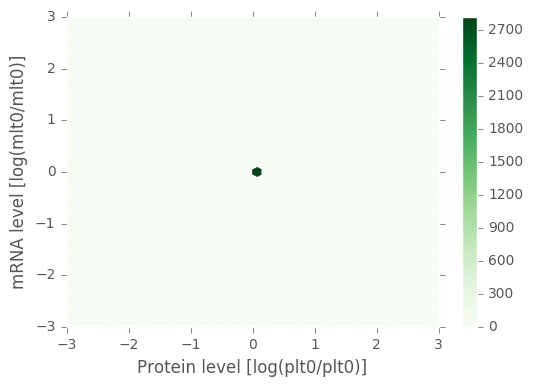

<function __main__.plot_relation>

In [17]:
x_min = -3
x_max = 3
y_min = -3
y_max = 3
nbins = 40

def plot_relation(t):
    fig, ax = plt.subplots()
    hx = ax.hexbin(np.log(data)['t'+str(t)+'p'], np.log(data)['t'+str(t)+'m'], cmap='Greens', gridsize=nbins, extent=[x_min, x_max, y_min, y_max])
    fig.colorbar(hx)
    plt.xlabel('Protein level [log(plt'+str(t)+'/plt0)]')
    plt.ylabel('mRNA level [log(mlt'+str(t)+'/mlt0)]')
    plt.show()
    
interact(plot_relation, t=IntSlider(min=0, max=10))

The action-reaction between mRNA and protein can be observed when looking at time *t = 1* and *t = 2*. At *t = 1*, the mRNA spreads and the stay small as if they are uncorrelated. At *t = 2*, the proteins level responds and we can see that the protein and mRNA levels are correlated. We can also see that correlation until time *t = 7*. After time *t = 6*, the data looks uncorrelated for some reason.

Definition of another useful plot function

In [18]:
def plot_set(k):
    if type(k) == int:
        plt.plot(prot_data.iloc[k].values, label='Protein')
        plt.plot(mRNA_data.iloc[k].values, label='mRNA')
        plt.title(prot_data.index[k])
    elif type(k) == str:
        plt.plot(prot_data.loc[k].values, label='Protein')
        plt.plot(mRNA_data.loc[k].values, label='mRNA')
        plt.title(k)
    else:
        raise NameError('unrecognize input type '+str(type(k)))
    
    plt.xlabel('Time []')
    plt.ylabel('Standardized ratio')
    
    plt.legend()
    plt.show()

# Correlations

## Considering only 'SPAC1002.02'

Let's look at the correlation for the first protein in our dataframe. First, we plot the entries for the first mRNA and protein for each time points.

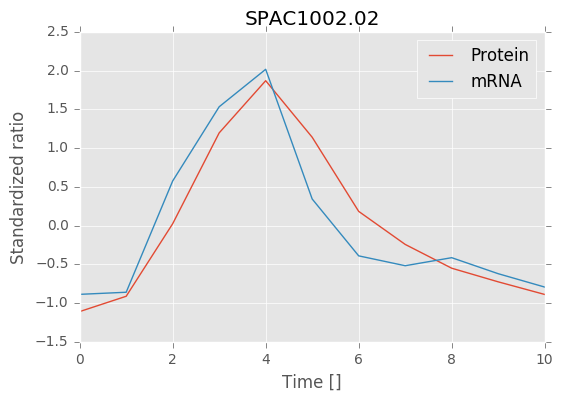

In [19]:
plot_set(0)

The two curves are similare so we might say that they are correlated. The quantification of the correlation between the standardized ratio of the protein 'SPAC1002.02' and the correspond mRNA can be done using Pearson's correlation :

$$ \text{corr}(X,Y) = \dfrac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$

In [20]:
def compute_corr(k):
    return prot_data.iloc[k].corr(mRNA_data.iloc[k], method='pearson')

print('correlation :', compute_corr(0))

correlation : 0.921495693413


The Pearson correlation values are between *-1* and *1*. A correlation of *0* means that they are **uncorrelated**, *-1* **anticorrelated** and *1* **correlated**. So as expected the mRNA levels and protein levels for 'SPAC1002.02' are correlated in time.

## Considering all mRNA and proteins pairs

Let's compute the correlation for all protein and mRNA pairs

In [74]:
correl = np.zeros((data.shape[0],))
for k in range(data.shape[0]):
    correl[k] = compute_corr(k)

corr_ = pd.Series(correl, index=data.index)

(2816,)

### Correlation distribution

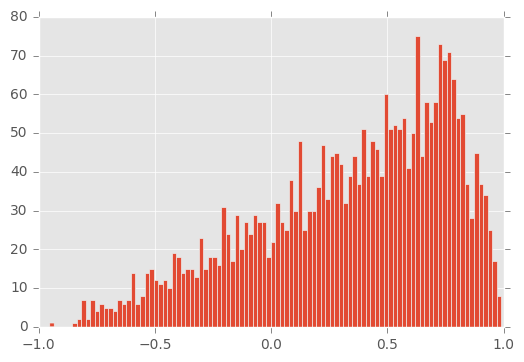

In [79]:
corr_.hist(bins=100)
plt.show()

### Most correlated

In [29]:
corr_.sort_values().tail()

SPBC27.03       0.973395
SPAC23H3.15c    0.974109
SPAC637.06      0.975517
SPACUNK4.17     0.977701
SPAC11D3.01c    0.988610
dtype: float64

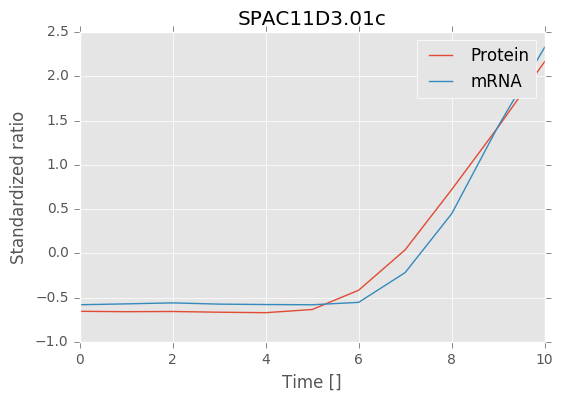

In [30]:
plot_set('SPAC11D3.01c')

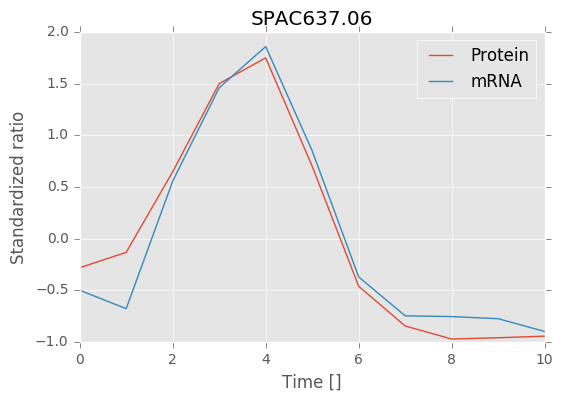

In [31]:
plot_set('SPAC637.06')

### Most anticorrelated

In [32]:
corr_.sort_values().head()

SPCC1682.01    -0.952655
SPAC3A12.11c   -0.842990
SPCC18.18c     -0.833734
SPCP1E11.07c   -0.820946
SPAC27F1.02c   -0.815169
dtype: float64

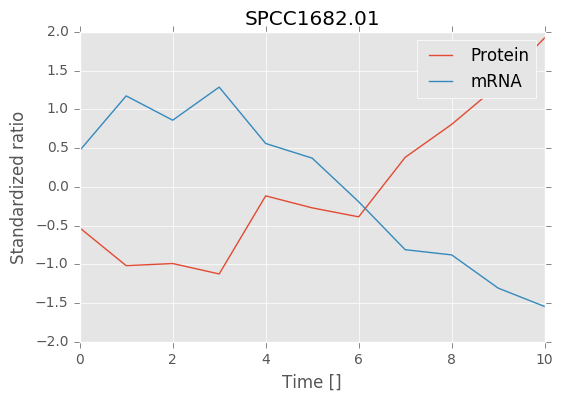

In [33]:
plot_set('SPCC1682.01')

### Most not correlated

In [64]:
sym_thr = 0.005
corr_[(-sym_thr<corr_) & (corr_<sym_thr)]

SPAC144.16      -0.004633
SPAC20H4.03c    -0.000004
SPAC3H8.07c     -0.000511
SPBC19C2.13c     0.002180
SPBC20F10.02c    0.002289
SPBC887.10       0.002604
SPCC11E10.02c   -0.003537
dtype: float64

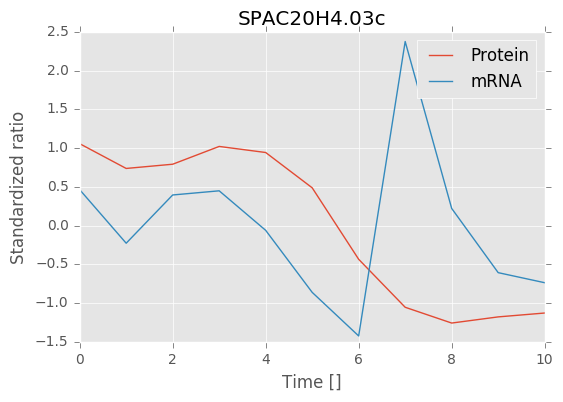

In [65]:
plot_set('SPAC20H4.03c')

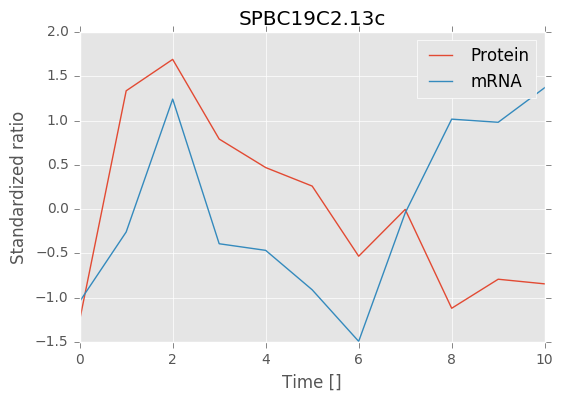

In [66]:
plot_set('SPBC19C2.13c')

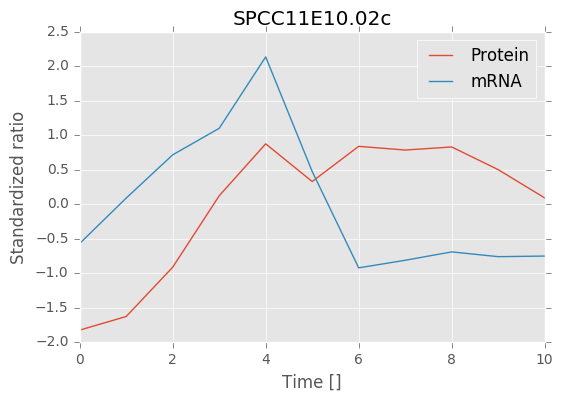

In [80]:
plot_set('SPCC11E10.02c')